# NLP Final Project

In [ ]:
!git clone https://github.com/CMU-MultiComp-Lab/CMU-MultimodalSDK.git
!cp -r CMU-MultimodalSDK/mmsdk mmsdk

Cloning into 'CMU-MultimodalSDK'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 86 (delta 7), reused 83 (delta 7), pack-reused 0
Receiving objects: 100% (86/86), 290.30 KiB | 3.67 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
!pip install transformers -q
!pip install validators -q
!pip install colorama -q
!pip install torcheval --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 15.1 MB/s eta 0:00:00


In [ ]:
import random
import torch

import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

from typing import NamedTuple
from tqdm import tqdm
from mmsdk import mmdatasdk

from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torch import FloatTensor, no_grad
from torch.optim import Adam
from transformers import BertTokenizer
from transformers import BertModel, BertTokenizer
from torcheval.metrics import R2Score, MeanSquaredError

/content/mmsdk/mmdatasdk/computational_sequence/file_ops.py:53: SyntaxWarning: "is" with a literal. Did you mean "=="?
  metadataHandle.create_dataset(metadataKey,(1,),dtype=h5py.special_dtype(vlen=unicode) if sys.version_info.major is 2 else h5py.special_dtype(vlen=str))
/content/mmsdk/mmdatasdk/computational_sequence/file_ops.py:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
  cast_operator=unicode if sys.version_info.major is 2 else str


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [ ]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
assert DEVICE == 'cuda'


<br></br>

### Generate Dataset

In [ ]:
# Download CMU-MOSI dataset from the mmdatasdk package
cmumosi_highlevel = mmdatasdk.mmdataset(mmdatasdk.cmu_mosi.highlevel, 'cmumosi/')
cmumosi_highlevel.add_computational_sequences(mmdatasdk.cmu_mosi.raw, 'cmumosi/')
cmumosi_highlevel.add_computational_sequences(mmdatasdk.cmu_mosi.labels,'cmumosi/')
cmumosi_highlevel.align('Opinion Segment Labels')

[2023-08-17 10:20:41.278] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/language/CMU_MOSI_TimestampedWordVectors.csd to cmumosi/CMU_MOSI_TimestampedWordVectors.csd...


[2023-08-17 10:20:43.991] | Success | Download complete!
[2023-08-17 10:20:43.992] | Success | Computational sequence read from file cmumosi/CMU_MOSI_TimestampedWordVectors.csd ...
[2023-08-17 10:20:44.001] | Status  | Checking the integrity of the <glove_vectors> computational sequence ...
[2023-08-17 10:20:44.001] | Status  | Checking the format of the data in <glove_vectors> computational sequence ...


[2023-08-17 10:20:44.044] | Success | <glove_vectors> computational sequence data in correct format.
[2023-08-17 10:20:44.044] | Status  | Checking the format of the metadata in <glove_vectors> computational sequence ...
[2023-08-17 10:20:44.044] | Warning | <glove_vectors> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:20:44.132] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_Facet_41.csd to cmumosi/CMU_MOSI_Visual_Facet_41.csd...


[2023-08-17 10:20:47.190] | Success | Download complete!
[2023-08-17 10:20:47.192] | Success | Computational sequence read from file cmumosi/CMU_MOSI_Visual_Facet_41.csd ...
[2023-08-17 10:20:47.208] | Status  | Checking the integrity of the <FACET_4.1> computational sequence ...
[2023-08-17 10:20:47.208] | Status  | Checking the format of the data in <FACET_4.1> computational sequence ...


[2023-08-17 10:20:47.388] | Success | <FACET_4.1> computational sequence data in correct format.
[2023-08-17 10:20:47.388] | Status  | Checking the format of the metadata in <FACET_4.1> computational sequence ...
[2023-08-17 10:20:47.388] | Warning | <FACET_4.1> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:20:47.485] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_Facet_42.csd to cmumosi/CMU_MOSI_Visual_Facet_42.csd...


[2023-08-17 10:20:50.253] | Success | Download complete!
[2023-08-17 10:20:50.254] | Success | Computational sequence read from file cmumosi/CMU_MOSI_Visual_Facet_42.csd ...
[2023-08-17 10:20:50.276] | Status  | Checking the integrity of the <FACET_4.2> computational sequence ...
[2023-08-17 10:20:50.276] | Status  | Checking the format of the data in <FACET_4.2> computational sequence ...


[2023-08-17 10:20:50.406] | Success | <FACET_4.2> computational sequence data in correct format.
[2023-08-17 10:20:50.406] | Status  | Checking the format of the metadata in <FACET_4.2> computational sequence ...
[2023-08-17 10:20:50.406] | Warning | <FACET_4.2> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:20:50.506] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_OpenSmile_EB10.csd to cmumosi/CMU_MOSI_OpenSmile_EB10.csd...


[2023-08-17 10:20:51.520] | Success | Download complete!
[2023-08-17 10:20:51.522] | Success | Computational sequence read from file cmumosi/CMU_MOSI_OpenSmile_EB10.csd ...
[2023-08-17 10:20:51.544] | Status  | Checking the integrity of the <OpenSmile_emobase2010> computational sequence ...
[2023-08-17 10:20:51.545] | Status  | Checking the format of the data in <OpenSmile_emobase2010> computational sequence ...


[2023-08-17 10:20:51.655] | Success | <OpenSmile_emobase2010> computational sequence data in correct format.
[2023-08-17 10:20:51.656] | Status  | Checking the format of the metadata in <OpenSmile_emobase2010> computational sequence ...
[2023-08-17 10:20:51.657] | Warning | <OpenSmile_emobase2010> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:20:51.745] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_openSMILE_IS09.csd to cmumosi/CMU_MOSI_openSMILE_IS09.csd...


[2023-08-17 10:21:09.682] | Success | Download complete!
[2023-08-17 10:21:09.690] | Success | Computational sequence read from file cmumosi/CMU_MOSI_openSMILE_IS09.csd ...
[2023-08-17 10:21:09.723] | Status  | Checking the integrity of the <b'OpenSMILE'> computational sequence ...
[2023-08-17 10:21:09.723] | Status  | Checking the format of the data in <b'OpenSMILE'> computational sequence ...


[2023-08-17 10:21:09.828] | Success | <b'OpenSMILE'> computational sequence data in correct format.
[2023-08-17 10:21:09.828] | Status  | Checking the format of the metadata in <b'OpenSMILE'> computational sequence ...
[2023-08-17 10:21:09.828] | Warning | <b'OpenSMILE'> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:21:09.922] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_OpenFace_1.csd to cmumosi/CMU_MOSI_Visual_OpenFace_1.csd...


[2023-08-17 10:21:32.906] | Success | Download complete!
[2023-08-17 10:21:32.907] | Success | Computational sequence read from file cmumosi/CMU_MOSI_Visual_OpenFace_1.csd ...
[2023-08-17 10:21:32.921] | Status  | Checking the integrity of the <OpenFace_1> computational sequence ...
[2023-08-17 10:21:32.921] | Status  | Checking the format of the data in <OpenFace_1> computational sequence ...


[2023-08-17 10:21:33.001] | Success | <OpenFace_1> computational sequence data in correct format.
[2023-08-17 10:21:33.002] | Status  | Checking the format of the metadata in <OpenFace_1> computational sequence ...
[2023-08-17 10:21:33.003] | Warning | <OpenFace_1> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:21:33.164] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_OpenFace_2.csd to cmumosi/CMU_MOSI_Visual_OpenFace_2.csd...


[2023-08-17 10:21:55.909] | Success | Download complete!
[2023-08-17 10:21:55.911] | Success | Computational sequence read from file cmumosi/CMU_MOSI_Visual_OpenFace_2.csd ...
[2023-08-17 10:21:55.918] | Status  | Checking the integrity of the <OpenFace_2> computational sequence ...
[2023-08-17 10:21:55.918] | Status  | Checking the format of the data in <OpenFace_2> computational sequence ...


[2023-08-17 10:21:55.959] | Success | <OpenFace_2> computational sequence data in correct format.
[2023-08-17 10:21:55.959] | Status  | Checking the format of the metadata in <OpenFace_2> computational sequence ...
[2023-08-17 10:21:55.960] | Warning | <OpenFace_2> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:21:56.048] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_COVAREP.csd to cmumosi/CMU_MOSI_COVAREP.csd...


[2023-08-17 10:22:11.045] | Success | Download complete!
[2023-08-17 10:22:11.047] | Success | Computational sequence read from file cmumosi/CMU_MOSI_COVAREP.csd ...
[2023-08-17 10:22:11.058] | Status  | Checking the integrity of the <COVAREP> computational sequence ...
[2023-08-17 10:22:11.059] | Status  | Checking the format of the data in <COVAREP> computational sequence ...


[2023-08-17 10:22:11.130] | Success | <COVAREP> computational sequence data in correct format.
[2023-08-17 10:22:11.130] | Status  | Checking the format of the metadata in <COVAREP> computational sequence ...
[2023-08-17 10:22:11.131] | Warning | <COVAREP> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:11.131] | Success | Dataset initialized successfully ... 
[2023-08-17 10:22:11.304] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/language/CMU_MOSI_TimestampedWords.csd to cmumosi/CMU_MOSI_TimestampedWords.csd...


[2023-08-17 10:22:11.563] | Success | Download complete!
[2023-08-17 10:22:11.564] | Success | Computational sequence read from file cmumosi/CMU_MOSI_TimestampedWords.csd ...
[2023-08-17 10:22:11.577] | Status  | Checking the integrity of the <words> computational sequence ...
[2023-08-17 10:22:11.577] | Status  | Checking the format of the data in <words> computational sequence ...


[2023-08-17 10:22:11.643] | Success | <words> computational sequence data in correct format.
[2023-08-17 10:22:11.643] | Status  | Checking the format of the metadata in <words> computational sequence ...
[2023-08-17 10:22:11.644] | Warning | <words> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:11.732] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/language/CMU_MOSI_TimestampedPhones.csd to cmumosi/CMU_MOSI_TimestampedPhones.csd...


[2023-08-17 10:22:12.044] | Success | Download complete!
[2023-08-17 10:22:12.045] | Success | Computational sequence read from file cmumosi/CMU_MOSI_TimestampedPhones.csd ...
[2023-08-17 10:22:12.056] | Status  | Checking the integrity of the <phoneme> computational sequence ...
[2023-08-17 10:22:12.058] | Status  | Checking the format of the data in <phoneme> computational sequence ...


[2023-08-17 10:22:12.136] | Success | <phoneme> computational sequence data in correct format.
[2023-08-17 10:22:12.137] | Status  | Checking the format of the metadata in <phoneme> computational sequence ...
[2023-08-17 10:22:12.138] | Warning | <phoneme> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:12.228] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/labels/CMU_MOSI_Opinion_Labels.csd to cmumosi/CMU_MOSI_Opinion_Labels.csd...


[2023-08-17 10:22:12.446] | Success | Download complete!
[2023-08-17 10:22:12.449] | Success | Computational sequence read from file cmumosi/CMU_MOSI_Opinion_Labels.csd ...
[2023-08-17 10:22:12.463] | Status  | Checking the integrity of the <Opinion Segment Labels> computational sequence ...
[2023-08-17 10:22:12.463] | Status  | Checking the format of the data in <Opinion Segment Labels> computational sequence ...


[2023-08-17 10:22:12.558] | Success | <Opinion Segment Labels> computational sequence data in correct format.
[2023-08-17 10:22:12.558] | Status  | Checking the format of the metadata in <Opinion Segment Labels> computational sequence ...
[2023-08-17 10:22:12.559] | Warning | <Opinion Segment Labels> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:12.561] | Status  | Unify was called ...
[2023-08-17 10:22:12.563] | Warning | c5xsKMxpXnc entry is not shared among all sequences, removing it ...
[2023-08-17 10:22:12.565] | Success | Unify completed ...
[2023-08-17 10:22:12.565] | Status  | Pre-alignment based on <Opinion Segment Labels> computational sequence started ...
[2023-08-17 10:22:19.687] | Status  | Pre-alignment done for <OpenFace_1> ...
[2023-08-17 10:22:29.980] | Status  | Pre-alignment done for <OpenFace_2> ...
[2023-08-17 10:22:30.155] | Status  | Pre-alignment done for <OpenSmile-emobase2010> ...
[2023-08-17 10:22:30.579] | S

Aligning 03bSnISJMiM:   0%|          | 0/13 [00:00<?, ? Segments/s]
                                                                   
Aligning 1DmNV9C1hbY:   0%|          | 0/14 [00:00<?, ? Segments/s]
                                                                   
Aligning 2WGyTLYerpo:  78%|███████▊  | 49/63 [00:00<00:00, 244.49 Segments/s]
                                                                             
Aligning 6Egk_28TtTM:   0%|          | 0/12 [00:00<?, ? Segments/s]
                                                                   
Aligning 9c67fiY0wGQ:   0%|          | 0/12 [00:00<?, ? Segments/s]
                                                                   
Aligning Bfr499ggo-0:   0%|          | 0/22 [00:00<?, ? Segments/s]
                                                                   
Aligning Iu2PFX3z_1s:   0%|          | 0/16 [00:00<?, ? Segments/s]
                                                                   
Aligning Jkswaaud0hk:   0%| 

[2023-08-17 10:22:48.033] | Success | Alignment to <Opinion Segment Labels> complete.
[2023-08-17 10:22:48.033] | Status  | Replacing dataset content with aligned computational sequences
[2023-08-17 10:22:48.057] | Success | Initialized empty <glove_vectors> computational sequence.
[2023-08-17 10:22:48.057] | Status  | Checking the format of the data in <glove_vectors> computational sequence ...


[2023-08-17 10:22:48.074] | Success | <glove_vectors> computational sequence data in correct format.
[2023-08-17 10:22:48.074] | Status  | Checking the format of the metadata in <glove_vectors> computational sequence ...
[2023-08-17 10:22:48.075] | Warning | <glove_vectors> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:48.075] | Success | Initialized empty <FACET_4.1> computational sequence.
[2023-08-17 10:22:48.077] | Status  | Checking the format of the data in <FACET_4.1> computational sequence ...


[2023-08-17 10:22:48.091] | Success | <FACET_4.1> computational sequence data in correct format.
[2023-08-17 10:22:48.092] | Status  | Checking the format of the metadata in <FACET_4.1> computational sequence ...
[2023-08-17 10:22:48.092] | Warning | <FACET_4.1> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:48.092] | Success | Initialized empty <FACET_4.2> computational sequence.
[2023-08-17 10:22:48.092] | Status  | Checking the format of the data in <FACET_4.2> computational sequence ...


[2023-08-17 10:22:48.105] | Success | <FACET_4.2> computational sequence data in correct format.
[2023-08-17 10:22:48.105] | Status  | Checking the format of the metadata in <FACET_4.2> computational sequence ...
[2023-08-17 10:22:48.105] | Warning | <FACET_4.2> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:48.105] | Success | Initialized empty <OpenSmile-emobase2010> computational sequence.
[2023-08-17 10:22:48.105] | Status  | Checking the format of the data in <OpenSmile-emobase2010> computational sequence ...


[2023-08-17 10:22:48.118] | Success | <OpenSmile-emobase2010> computational sequence data in correct format.
[2023-08-17 10:22:48.119] | Status  | Checking the format of the metadata in <OpenSmile-emobase2010> computational sequence ...
[2023-08-17 10:22:48.119] | Warning | <OpenSmile-emobase2010> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:48.119] | Success | Initialized empty <OpenSMILE> computational sequence.
[2023-08-17 10:22:48.119] | Status  | Checking the format of the data in <OpenSMILE> computational sequence ...


[2023-08-17 10:22:48.138] | Success | <OpenSMILE> computational sequence data in correct format.
[2023-08-17 10:22:48.139] | Status  | Checking the format of the metadata in <OpenSMILE> computational sequence ...
[2023-08-17 10:22:48.139] | Warning | <OpenSMILE> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:48.139] | Success | Initialized empty <OpenFace_1> computational sequence.
[2023-08-17 10:22:48.139] | Status  | Checking the format of the data in <OpenFace_1> computational sequence ...


[2023-08-17 10:22:48.152] | Success | <OpenFace_1> computational sequence data in correct format.
[2023-08-17 10:22:48.152] | Status  | Checking the format of the metadata in <OpenFace_1> computational sequence ...
[2023-08-17 10:22:48.152] | Warning | <OpenFace_1> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:48.152] | Success | Initialized empty <OpenFace_2> computational sequence.
[2023-08-17 10:22:48.152] | Status  | Checking the format of the data in <OpenFace_2> computational sequence ...


[2023-08-17 10:22:48.161] | Success | <OpenFace_2> computational sequence data in correct format.
[2023-08-17 10:22:48.161] | Status  | Checking the format of the metadata in <OpenFace_2> computational sequence ...
[2023-08-17 10:22:48.161] | Warning | <OpenFace_2> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:48.161] | Success | Initialized empty <COVAREP> computational sequence.
[2023-08-17 10:22:48.161] | Status  | Checking the format of the data in <COVAREP> computational sequence ...


[2023-08-17 10:22:48.181] | Success | <COVAREP> computational sequence data in correct format.
[2023-08-17 10:22:48.182] | Status  | Checking the format of the metadata in <COVAREP> computational sequence ...
[2023-08-17 10:22:48.182] | Warning | <COVAREP> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:48.182] | Success | Initialized empty <words> computational sequence.
[2023-08-17 10:22:48.182] | Status  | Checking the format of the data in <words> computational sequence ...


[2023-08-17 10:22:48.199] | Success | <words> computational sequence data in correct format.
[2023-08-17 10:22:48.200] | Status  | Checking the format of the metadata in <words> computational sequence ...
[2023-08-17 10:22:48.200] | Warning | <words> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:48.200] | Success | Initialized empty <phonemes> computational sequence.
[2023-08-17 10:22:48.200] | Status  | Checking the format of the data in <phonemes> computational sequence ...


[2023-08-17 10:22:48.215] | Success | <phonemes> computational sequence data in correct format.
[2023-08-17 10:22:48.216] | Status  | Checking the format of the metadata in <phonemes> computational sequence ...
[2023-08-17 10:22:48.216] | Warning | <phonemes> computational sequence does not have all the required metadata ... continuing 
[2023-08-17 10:22:48.216] | Success | Initialized empty <Opinion Segment Labels> computational sequence.
[2023-08-17 10:22:48.216] | Status  | Checking the format of the data in <Opinion Segment Labels> computational sequence ...


[2023-08-17 10:22:48.233] | Success | <Opinion Segment Labels> computational sequence data in correct format.
[2023-08-17 10:22:48.233] | Status  | Checking the format of the metadata in <Opinion Segment Labels> computational sequence ...
[2023-08-17 10:22:48.233] | Warning | <Opinion Segment Labels> computational sequence does not have all the required metadata ... continuing 


In [ ]:
cmumosi_highlevel.keys()

dict_keys(['glove_vectors', 'FACET_4.1', 'FACET_4.2', 'OpenSmile-emobase2010', 'OpenSMILE', 'OpenFace_1', 'OpenFace_2', 'COVAREP', 'words', 'phonemes', 'Opinion Segment Labels'])

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
SEP = 'sp'
RANDOM_SEED = 42

class DataPreprocessor:
  """
  A Processing class responsible for feature and label alignments according to WordPiece tokenization
  """
    def __init__(self, cmumosi_highlevel, tokenizer: BertTokenizer, random_seed=RANDOM_SEED, split_size=0.2):
        self.__cmumosi_highlevel = cmumosi_highlevel
        self.__tokenizer = tokenizer
        self.__random_seed = random_seed
        self.__split_size = split_size

    def __to_seq(self, df):
        return list(df[['text', 'visual_features', 'label']].itertuples(index=False, name=None))

    def __generate_labels_df(self):
        labels_df = pd.DataFrame(self.__cmumosi_highlevel['Opinion Segment Labels'].data).T
        labels_df.columns = ['intervals', 'label']
        labels_df['t_start'] = labels_df['intervals'].apply(lambda x: x[0][0])
        labels_df['t_end'] = labels_df['intervals'].apply(lambda x: x[0][1])
        labels_df = labels_df.drop(columns='intervals')
        labels_df['label'] = labels_df['label'].apply(lambda x: x[0][0])

        return labels_df.reset_index().rename(columns={'index': 'sample_id'})

    def __generate_language_modality(self) -> pd.DataFrame:
        words_df = pd.DataFrame(self.__cmumosi_highlevel['words'].data).T.reset_index().rename(columns={'index': 'sample_id'})
        words_df = words_df.explode(['features', 'intervals']).reset_index(drop=True)
        words_df['word'] = words_df.features.apply(lambda x: x[0].decode('utf-8'))
        words_df = words_df[words_df.word != SEP].reset_index().drop(columns=['index'])
        words_df['t_start'] = words_df.intervals.apply(lambda x: x[0])
        words_df['t_end'] = words_df.intervals.apply(lambda x: x[1])
        words_df = words_df.drop(columns=['features', 'intervals'])

        return words_df

    def __generate_visual_modality(self) -> pd.DataFrame:
        visual_modality = pd.DataFrame.from_records(self.__cmumosi_highlevel['OpenFace_1'].data).T
        visual_modality = visual_modality.reset_index().rename(columns={'index': 'sample_id'})
        visual_modality = visual_modality.explode(['intervals', 'features']).reset_index(drop=True)
        visual_modality['t_start'] = visual_modality.intervals.apply(lambda x: float(x[0]))
        visual_modality['t_end'] = visual_modality.intervals.apply(lambda x: float(x[1]))
        visual_modality = visual_modality.drop(columns=['intervals'])
        return visual_modality


    def __generate_data(self) -> pd.DataFrame:
        labels_df = self.__generate_labels_df()
        language_modality = self.__generate_language_modality()
        visual_modality = self.__generate_visual_modality()

        # merge the dataframes and align according to word piece tokenization (BERT tokenizaition)
        data = pd.merge(language_modality, visual_modality, on='sample_id')
        data = data[(data.t_start_x <= data.t_start_y) & (data.t_end_x >= data.t_end_y)]
        data = data.drop(columns=['t_start_y', 't_end_y']).rename(columns={'t_start_x': 't_start', 't_end_x': 't_end'})
        data = data.groupby(['sample_id', 'word', 't_start', 't_end']).agg({'features': lambda x: np.mean(x)}).reset_index().sort_values(by=['sample_id', 't_start'])
        data['text'] = data.groupby('sample_id')['word'].transform(lambda x: ' '.join(x))
        data['bert_token'] = data.word.apply(lambda x: self.__tokenizer.encode(x, add_special_tokens=False))
        data = data.explode('bert_token')
        data = data.rename(columns={'features': 'visual_features'})
        data = data.groupby('sample_id').agg({'text': lambda x: x.iloc[0], 'visual_features': lambda x: np.stack(x)}).reset_index()
        data = pd.merge(data, labels_df, on='sample_id')

        return data

    def prepare_data(self):
        """
        genrerates CMU-MOSI train, validation and tests datasets
        @return:
          - train        List[Tuple[str, ndarray, float]]
          - validation   List[Tuple[str, ndarray, float]]
          - test         List[Tuple[str, ndarray, float]]
        """
        data_df = self.__generate_data()
        train_df, test_df = train_test_split(data_df, test_size=self.__split_size, random_state=self.__random_seed)
        train_df, val_df = train_test_split(train_df, test_size=self.__split_size, random_state=self.__random_seed)
        return self.__to_seq(train_df), self.__to_seq(val_df), self.__to_seq(test_df)

In [ ]:
class CMUMOSIDataset(Dataset):
    def __init__(self, data, tokenizer: BertTokenizer):
        self.__data = data
        self.__tokenizer = tokenizer

    def __len__(self):
        return len(self.__data)

    def __getitem__(self, idx):
        return self.__data[idx]

    def collate_fn(self, batch):
        language, visual, label = zip(*batch)
        language = self.__tokenizer(language, padding=True, return_tensors="pt")
        visual = pad_sequence([FloatTensor(x) for x in visual], batch_first=True)
        return language, visual, FloatTensor(label)

In [ ]:
train, val, test = DataPreprocessor(cmumosi_highlevel, tokenizer).prepare_data()

train_dataset = CMUMOSIDataset(train, tokenizer)
val_dataset = CMUMOSIDataset(val, tokenizer)
test_dataset = CMUMOSIDataset(test, tokenizer)

train_dl = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=train_dataset.collate_fn)
val_dl = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=val_dataset.collate_fn)
test_dl = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=test_dataset.collate_fn)

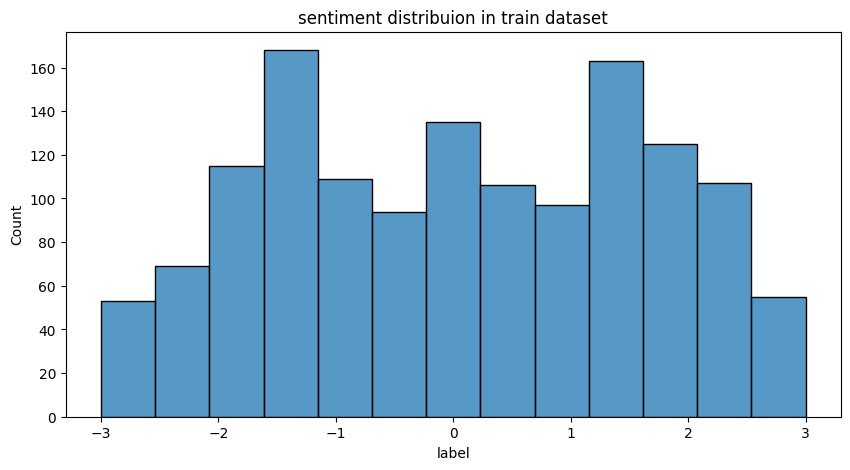

In [ ]:
# plot train data label distribution
_, ax = plt.subplots(figsize=(10, 5))
train_df = pd.DataFrame(train, columns=['language', 'visual', 'label'])
sns.histplot(data=train_df, x='label', ax=ax)
ax.set(title='sentiment distribuion in train dataset');

In [ ]:
print(f'{len(train_dataset)=}')
print(f'{len(val_dataset)=}')
print(f'{len(test_dataset)=}')

len(train_dataset)=1396
len(val_dataset)=350
len(test_dataset)=437


<br></br>
## MCTN Model

In [ ]:
class MCTNLosses(NamedTuple):
    forward_translation_loss: FloatTensor = None
    cycle_consistency_loss: FloatTensor = None
    prediction_loss: FloatTensor = None


class MCTNOuputs(NamedTuple):
    prediction: FloatTensor
    losses: MCTNLosses = None


class MCTN(nn.Module):
    def __init__(self, bert_model, t_hidden_size=430, n_decoder_layers=2):
        super(MCTN, self).__init__()

        s_hidden_size = bert_model.config.hidden_size
        self.bert_model = bert_model
        self.linear_ts = nn.Linear(t_hidden_size, s_hidden_size)
        decoder_layer = nn.TransformerDecoderLayer(d_model=s_hidden_size, nhead=8, batch_first=True)
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=n_decoder_layers)
        self.sentiment_regressor = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(s_hidden_size, 1)
        )

        self.lt_loss = nn.SmoothL1Loss()
        self.lc_loss = nn.SmoothL1Loss()
        self.pred_loss = nn.MSELoss()


    def forward(self, language, visual=None, label=None):
        if visual is None:
            return self._inference(language, label)

        # forward translation
        outputs_s = self.bert_model(**language)
        Hst = outputs_s.last_hidden_state
        Xt = self.linear_ts(visual)
        Xt_hat = self.decoder(Xt, Hst)

        # backward translation
        Hts = self.bert_model(inputs_embeds=Xt_hat, output_hidden_states=True).last_hidden_state
        Xs = outputs_s.hidden_states[0]
        Xs_hat = self.decoder(Xs, Hts)

        # sentiment prediction
        pred = self.sentiment_regressor(Hst[:, 0, :]).squeeze()
        outputs = MCTNOuputs(pred)

        if label is not None:
            lt = self.lt_loss(Xt_hat, Xt)       # forward translation loss
            lc = self.lc_loss(Xs_hat, Xs)       # cycle consistency loss
            ls = self.pred_loss(pred, label)    # prediction loss
            losses = MCTNLosses(lt, lc, ls)
            outputs = MCTNOuputs(pred, losses)

        return outputs

    def _inference(self, language, label=None):
        "to be used during textual inference (no acoustic modality)"
        outputs_s = self.bert_model(**language)
        pred = self.sentiment_regressor(outputs_s.last_hidden_state[:, 0, :]).squeeze()
        outputs = MCTNOuputs(pred)

        if label is not None:
            ls = self.pred_loss(pred, label)    # prediction loss
            losses = MCTNLosses(prediction_loss=ls)
            outputs = MCTNOuputs(pred, losses)

        return outputs

<br></br>
## Training

In [ ]:
class Trainer:
    def __init__(self, model, train_dl, val_dl, optimizer, lambda_t=1, lambda_c=1):
        self.__model = model
        self.__train_dl = train_dl
        self.__val_dl = val_dl
        self.__optimizer = optimizer
        self.__lambda_t = lambda_t
        self.__lambda_c = lambda_c


    @property
    def model(self):
        return self.__model


    def __forward_single_batch(self, language, visual, label):
        language, visual, label = language.to(DEVICE), visual.to(DEVICE), label.to(DEVICE)
        outputs = self.__model(language, visual, label)
        losses = outputs.losses
        loss = losses.forward_translation_loss * self.__lambda_t + losses.cycle_consistency_loss * self.__lambda_c + losses.prediction_loss
        return outputs, loss


    def __run_epoch(self, dl, train: bool):
        if train:
            self.__model.train()
            desc = "Training"
        else:
            self.__model.eval()
            desc = "Evaluating"

        epoch_losses = []
        mctn_losses = []
        with tqdm(total=len(dl), desc=desc, leave=False) as pbar:
            for idx, (language, visual, label) in enumerate(dl):
                if train:
                    self.__optimizer.zero_grad()

                outputs, loss = self.__forward_single_batch(language, visual, label)

                if train:
                    loss.backward()
                    self.__optimizer.step()

                epoch_losses.append(loss.item())
                mctn_losses.append(tuple([x.item() for x in outputs.losses]))

                if idx % 5 == 0:
                    pbar.set_postfix({"loss": epoch_losses[-1]})
                pbar.update(1)

        return np.mean(epoch_losses), np.array(mctn_losses).mean(axis=0)


    def train(self, epochs=10):
        train_losses = []
        mctn_train_losses = []
        val_losses = []
        mctn_val_losses = []

        for epoch in range(epochs):
            epoch_loss, mctn_loss = self.__run_epoch(self.__train_dl, train=True)
            train_losses.append(epoch_loss)
            mctn_train_losses.append(mctn_loss)

            with no_grad():
                epoch_loss, mctn_loss = self.__run_epoch(self.__val_dl, train=False)
                val_losses.append(epoch_loss)
                mctn_val_losses.append(mctn_loss)

            print(f"Epoch {epoch+1}/{epochs} | Train loss: {train_losses[-1]} | Train MCTN loss: {mctn_train_losses[-1]} | Val loss: {val_losses[-1]} | Val MCTN loss: {mctn_val_losses[-1]}")

        return train_losses, mctn_train_losses, val_losses, mctn_val_losses


    def evaluate(self, dl):
        return self.__run_epoch(dl, train=False)


    def evaluate_language(self, dl) -> float:
        self.__model.eval()
        losses = []
        with no_grad(), tqdm(total=len(dl), desc="Evaluating", leave=False) as pbar:
            for idx, (language, label) in enumerate(dl):
                language, label = language.to(DEVICE), label.to(DEVICE)
                outputs = self.__model(language=language, label=label)
                losses.append(outputs.losses.prediction_loss.item())
                pbar.update(1)

        return np.mean(losses)

In [ ]:
def plot_train_results(mctn_train_losses, mctn_val_losses, title_suffix=''):
    cols = ["forward_translation_loss", "cycle_consistency_loss", "prediction_loss"]
    train_mctn_losses_df = pd.DataFrame(mctn_train_losses, columns=cols)
    val_mctn_losses_df = pd.DataFrame(mctn_val_losses, columns=cols)

    _, ax = plt.subplots(1, 3, figsize=(20, 5))
    for i, loss in enumerate(cols):
        sns.lineplot(data=train_mctn_losses_df[loss], ax=ax[i], label="train")
        sns.lineplot(data=val_mctn_losses_df[loss], ax=ax[i], label="val")
        ax[i].set_title(loss + ' ' + title_suffix)
        ax[i].set_xlabel("Epoch")
        ax[i].set_ylabel("Loss")

In [ ]:
def run_experiment(lt, lc, epochs=10) -> Trainer:
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
  bert_model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)
  mctn = MCTN(bert_model).to(DEVICE)
  optimizer = Adam(mctn.parameters(), lr=1e-5)

  trainer = Trainer(mctn, train_dl, val_dl, optimizer, lambda_t=lt, lambda_c=lc)
  train_losses, mctn_train_losses, val_losses, mctn_val_losses = trainer.train(epochs=epochs)
  plot_train_results(mctn_train_losses, mctn_val_losses, title_suffix=f'{lt=}, {lc=}')

  test_loss, test_mctn_losses = trainer.evaluate(test_dl)
  print(f'{test_loss=}, {test_mctn_losses=}')

  return trainer

<br></br>
### Running serveral experiments with multiple hyperparameters

In [ ]:
trainers = {}

for lt, lc in [
    (0.5, 0.5),
    (0.2, 0.8),
    (0.8, 0.2),
    (1, 0),
    (0, 1),
    (0, 0)
  ]:
  trainers[(lt, lc)] = run_experiment(lt, lc, epochs=20)

<br></br>
## MCTN candidate VS Baseline Model

Epoch 1/40 | Train loss: 18.60145367275585 | Train MCTN loss: [32.41856753  0.18477133  2.29978428] | Val loss: 14.967029918323863 | Val MCTN loss: [26.47692091  0.16114747  1.64799606]


Epoch 2/40 | Train loss: 13.725397305055099 | Train MCTN loss: [24.75912129  0.15126555  1.27020397] | Val loss: 11.407771717418324 | Val MCTN loss: [20.42971819  0.13962274  1.12310127]


Epoch 3/40 | Train loss: 10.068976640701294 | Train MCTN loss: [18.44257283  0.13290932  0.78123559] | Val loss: 9.057029247283936 | Val MCTN loss: [15.58556643  0.11913889  1.20467653]


Epoch 4/40 | Train loss: 7.508538002317602 | Train MCTN loss: [13.82360917  0.11469538  0.5393858 ] | Val loss: 7.262638828971169 | Val MCTN loss: [11.94154124  0.09926737  1.24223463]


Epoch 5/40 | Train loss: 5.782094180583954 | Train MCTN loss: [10.65467811  0.0979874   0.40576149] | Val loss: 5.831411144950173 | Val MCTN loss: [9.24824689 0.08335455 1.16561039]


Epoch 6/40 | Train loss: 4.507484652779319 | Train MCTN loss: [8.32709458 0.08434809 0.30176332] | Val loss: 5.045749599283392 | Val MCTN loss: [7.41373682 0.06982864 1.30396688]


Epoch 7/40 | Train loss: 3.863706447861411 | Train MCTN loss: [7.17089553 0.07337897 0.24156921] | Val loss: 4.232531547546387 | Val MCTN loss: [6.09299222 0.05817617 1.15694739]


Epoch 8/40 | Train loss: 3.112175101583654 | Train MCTN loss: [5.79191047 0.06396777 0.18423595] | Val loss: 3.7701002901250664 | Val MCTN loss: [5.16741967 0.05263566 1.16007267]


Epoch 9/40 | Train loss: 2.652383354577151 | Train MCTN loss: [4.91661455 0.0605225  0.16381482] | Val loss: 3.4500650492581455 | Val MCTN loss: [4.55468191 0.05114304 1.14715261]


Epoch 10/40 | Train loss: 2.4077666483142157 | Train MCTN loss: [4.45137222 0.05888175 0.15263968] | Val loss: 3.203039841218428 | Val MCTN loss: [4.09872313 0.05024162 1.1285575 ]


Epoch 11/40 | Train loss: 2.1783546547998083 | Train MCTN loss: [4.02265147 0.05745389 0.13830194] | Val loss: 3.02651554887945 | Val MCTN loss: [3.75118505 0.04946431 1.12619088]


Epoch 12/40 | Train loss: 2.002657577395439 | Train MCTN loss: [3.72273636 0.05640179 0.11308849] | Val loss: 2.8651175932450728 | Val MCTN loss: [3.456277   0.04879116 1.11258348]


Epoch 13/40 | Train loss: 1.8942022201689808 | Train MCTN loss: [3.48503244 0.05565693 0.12385755] | Val loss: 2.755190134048462 | Val MCTN loss: [3.20937419 0.04816839 1.12641889]


Epoch 14/40 | Train loss: 1.7655468813397668 | Train MCTN loss: [3.25188024 0.05467799 0.11226776] | Val loss: 2.6408375176516445 | Val MCTN loss: [2.99186954 0.04762507 1.12109025]


Epoch 15/40 | Train loss: 1.6449251242659308 | Train MCTN loss: [3.02938389 0.0540036  0.10323138] | Val loss: 2.492892200296575 | Val MCTN loss: [2.80679336 0.04693173 1.06602958]


Epoch 16/40 | Train loss: 1.5515798804434864 | Train MCTN loss: [2.86348519 0.05319255 0.09324102] | Val loss: 2.450670350681652 | Val MCTN loss: [2.62890224 0.046264   1.11308725]


Epoch 17/40 | Train loss: 1.4795325168154456 | Train MCTN loss: [2.73570411 0.05245159 0.08545468] | Val loss: 2.347211946140636 | Val MCTN loss: [2.47368727 0.04558811 1.08757422]


Epoch 18/40 | Train loss: 1.4465665966272354 | Train MCTN loss: [2.64030654 0.05195248 0.10043709] | Val loss: 2.224609916860407 | Val MCTN loss: [2.32309521 0.04472276 1.04070091]


Epoch 19/40 | Train loss: 1.273662656545639 | Train MCTN loss: [2.3190878  0.05055131 0.08884309] | Val loss: 2.2037347230044277 | Val MCTN loss: [2.19356533 0.04378675 1.08505869]


Epoch 20/40 | Train loss: 1.2365547161210666 | Train MCTN loss: [2.25942482 0.04967859 0.08200302] | Val loss: 2.107497800480236 | Val MCTN loss: [2.07203035 0.04253602 1.05021464]


Epoch 21/40 | Train loss: 1.1575391617688267 | Train MCTN loss: [2.11202324 0.04850721 0.07727394] | Val loss: 2.0349911668083887 | Val MCTN loss: [1.9579441  0.04091433 1.03556198]


Epoch 22/40 | Train loss: 1.0600787529891187 | Train MCTN loss: [1.92197277 0.0465007  0.07584202] | Val loss: 2.007439201528376 | Val MCTN loss: [1.85525287 0.03868348 1.06047104]


Epoch 23/40 | Train loss: 1.0206449743021617 | Train MCTN loss: [1.85458053 0.04454145 0.07108398] | Val loss: 1.9432160529223355 | Val MCTN loss: [1.7587793  0.03614279 1.045755  ]


Epoch 24/40 | Train loss: 1.0049088935960422 | Train MCTN loss: [1.81949965 0.04332919 0.07349447] | Val loss: 1.889325813813643 | Val MCTN loss: [1.66789553 0.03570696 1.03752459]


Epoch 25/40 | Train loss: 0.9349025481126525 | Train MCTN loss: [1.69200638 0.04267881 0.06755995] | Val loss: 1.8473255742679944 | Val MCTN loss: [1.57555426 0.03531975 1.04188858]


Epoch 26/40 | Train loss: 0.9160456948659637 | Train MCTN loss: [1.64911487 0.04248786 0.07024433] | Val loss: 1.8140238523483276 | Val MCTN loss: [1.49458998 0.03508339 1.04918717]


Epoch 27/40 | Train loss: 0.850966827435927 | Train MCTN loss: [1.53546432 0.04192047 0.06227443] | Val loss: 1.7585579373619773 | Val MCTN loss: [1.41768318 0.0349046  1.03226405]


Epoch 28/40 | Train loss: 0.7827160175551068 | Train MCTN loss: [1.39988948 0.04146245 0.06204006] | Val loss: 1.713921611959284 | Val MCTN loss: [1.34538084 0.03469516 1.02388363]


Epoch 29/40 | Train loss: 0.779257217591459 | Train MCTN loss: [1.38323792 0.04135838 0.06695907] | Val loss: 1.6711579452861438 | Val MCTN loss: [1.28155537 0.03466498 1.01304779]


Epoch 30/40 | Train loss: 0.7237942239100282 | Train MCTN loss: [1.27931407 0.04091198 0.06368119] | Val loss: 1.6405669992620295 | Val MCTN loss: [1.21912428 0.03438167 1.01381404]


Epoch 31/40 | Train loss: 0.6985937600786035 | Train MCTN loss: [1.24938181 0.04084903 0.05347834] | Val loss: 1.5908975492824207 | Val MCTN loss: [1.16071269 0.03422853 0.99342693]


Epoch 32/40 | Train loss: 0.6788213835521177 | Train MCTN loss: [1.20754929 0.04060577 0.05474386] | Val loss: 1.5749584328044544 | Val MCTN loss: [1.10702651 0.03405627 1.00441703]


Epoch 33/40 | Train loss: 0.6289795887741175 | Train MCTN loss: [1.10741327 0.04013668 0.05520461] | Val loss: 1.5505354621193626 | Val MCTN loss: [1.06089776 0.03394291 1.00311514]


Epoch 34/40 | Train loss: 0.6077624098821119 | Train MCTN loss: [1.07318653 0.04007186 0.05113321] | Val loss: 1.5315118594603105 | Val MCTN loss: [1.01036619 0.03387018 1.00939369]


Epoch 35/40 | Train loss: 0.5790267796678976 | Train MCTN loss: [1.01923151 0.03963873 0.04959167] | Val loss: 1.510102477940646 | Val MCTN loss: [0.96555276 0.03374689 1.01045264]


Epoch 36/40 | Train loss: 0.5470530980012633 | Train MCTN loss: [0.95599026 0.03936041 0.04937776] | Val loss: 1.5022384903647683 | Val MCTN loss: [0.92216802 0.03364328 1.02433284]


Epoch 37/40 | Train loss: 0.5362392095002261 | Train MCTN loss: [0.9348146  0.03923195 0.04921594] | Val loss: 1.4578165791251443 | Val MCTN loss: [0.88550374 0.03358827 0.99827057]


Epoch 38/40 | Train loss: 0.5226967036724091 | Train MCTN loss: [0.9080719  0.03912165 0.04909992] | Val loss: 1.4346116781234741 | Val MCTN loss: [0.84527659 0.03346734 0.99523971]


Epoch 39/40 | Train loss: 0.49262274463068356 | Train MCTN loss: [0.85098856 0.03887789 0.04768952] | Val loss: 1.4041255658323115 | Val MCTN loss: [0.80703384 0.03332004 0.98394864]


Epoch 40/40 | Train loss: 0.46763597801327705 | Train MCTN loss: [0.79847949 0.0385511  0.04912068] | Val loss: 1.3872364542701028 | Val MCTN loss: [0.77477634 0.03328883 0.98320387]


test_loss=1.3723670967987605, test_mctn_losses=array([0.89356356, 0.03357751, 0.90879658])


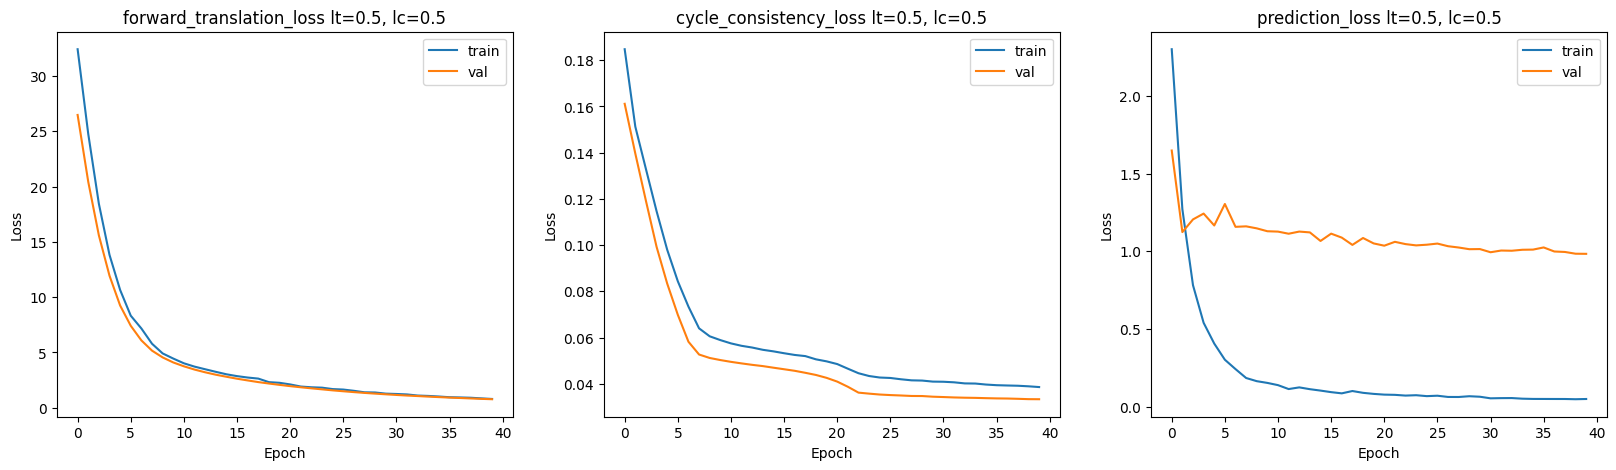

In [ ]:
mctn_trainer = run_experiment(0.5, 0.5, epochs=40)

Epoch 1/40 | Train loss: 2.3185652060942217 | Train MCTN loss: [33.92559979  0.23593497  2.31856521] | Val loss: 1.6754578893834895 | Val MCTN loss: [32.05036892  0.24622472  1.67545789]


Epoch 2/40 | Train loss: 1.3187588940967212 | Train MCTN loss: [32.44992432  0.24304975  1.31875889] | Val loss: 1.149267386306416 | Val MCTN loss: [32.05547957  0.25082549  1.14926739]


Epoch 3/40 | Train loss: 0.8416582318869504 | Train MCTN loss: [32.66052498  0.24415058  0.84165823] | Val loss: 1.1069325858896428 | Val MCTN loss: [32.05614888  0.25157412  1.10693259]


Epoch 4/40 | Train loss: 0.575781484219161 | Train MCTN loss: [34.87977839  0.24341399  0.57578148] | Val loss: 1.0840318365530535 | Val MCTN loss: [32.05523057  0.25201547  1.08403184]


Epoch 5/40 | Train loss: 0.40760884941978887 | Train MCTN loss: [31.96576164  0.24655635  0.40760885] | Val loss: 1.0248556462201206 | Val MCTN loss: [32.05540657  0.25228007  1.02485565]


Epoch 6/40 | Train loss: 0.29508158937096596 | Train MCTN loss: [33.20575664  0.24549899  0.29508159] | Val loss: 1.0929995070804248 | Val MCTN loss: [32.05454098  0.25243125  1.09299951]


Epoch 7/40 | Train loss: 0.22757531702518463 | Train MCTN loss: [33.38377151  0.24514955  0.22757532] | Val loss: 1.0183156024325977 | Val MCTN loss: [32.05506307  0.25190694  1.0183156 ]


Epoch 8/40 | Train loss: 0.20242408849298954 | Train MCTN loss: [33.18938021  0.24492544  0.20242409] | Val loss: 1.0341240709478206 | Val MCTN loss: [32.05469652  0.25171016  1.03412407]


Epoch 9/40 | Train loss: 0.17899211851710622 | Train MCTN loss: [32.96996867  0.24506341  0.17899212] | Val loss: 1.02024845643477 | Val MCTN loss: [32.05470917  0.25170418  1.02024846]


Epoch 10/40 | Train loss: 0.1534615856680003 | Train MCTN loss: [33.20020292  0.24471655  0.15346159] | Val loss: 1.0230188911611384 | Val MCTN loss: [32.05478373  0.25140068  1.02301889]


Epoch 11/40 | Train loss: 0.13293030595576222 | Train MCTN loss: [32.95580374  0.24487689  0.13293031] | Val loss: 0.9575579816644842 | Val MCTN loss: [32.05486766  0.25139798  0.95755798]


Epoch 12/40 | Train loss: 0.1277307630939917 | Train MCTN loss: [33.47148156  0.24411719  0.12773076] | Val loss: 0.9959145079959523 | Val MCTN loss: [32.0546334   0.25145396  0.99591451]


Epoch 13/40 | Train loss: 0.13060263713652437 | Train MCTN loss: [33.48225904  0.24404491  0.13060264] | Val loss: 1.0041952295736833 | Val MCTN loss: [32.05450908  0.25086124  1.00419523]


Epoch 14/40 | Train loss: 0.12252270895987749 | Train MCTN loss: [32.60336176  0.24447921  0.12252271] | Val loss: 0.9811283620921049 | Val MCTN loss: [32.05446763  0.25133942  0.98112836]


Epoch 15/40 | Train loss: 0.10430472276427528 | Train MCTN loss: [32.84989116  0.24446898  0.10430472] | Val loss: 0.9796179533004761 | Val MCTN loss: [32.05434765  0.25113779  0.97961795]


Epoch 16/40 | Train loss: 0.09922965759919448 | Train MCTN loss: [31.70051217  0.24475059  0.09922966] | Val loss: 0.99808039448478 | Val MCTN loss: [32.05423043  0.25063116  0.99808039]


Epoch 17/40 | Train loss: 0.10135048221458089 | Train MCTN loss: [31.7507404   0.24471783  0.10135048] | Val loss: 1.006067005070773 | Val MCTN loss: [32.05413298  0.25089117  1.00606701]


Epoch 18/40 | Train loss: 0.1005982245233926 | Train MCTN loss: [32.66670741  0.24444322  0.10059822] | Val loss: 0.9856191169131886 | Val MCTN loss: [32.05457028  0.25118577  0.98561912]


Epoch 19/40 | Train loss: 0.09143741378052668 | Train MCTN loss: [31.66317764  0.24476092  0.09143741] | Val loss: 0.9545752839608626 | Val MCTN loss: [32.05436707  0.25011491  0.95457528]


Epoch 20/40 | Train loss: 0.08676555693488229 | Train MCTN loss: [32.96462072  0.24295663  0.08676556] | Val loss: 0.9731012420220808 | Val MCTN loss: [32.05427378  0.24964941  0.97310124]


Epoch 21/40 | Train loss: 0.08303330008956519 | Train MCTN loss: [32.66355467  0.24275652  0.0830333 ] | Val loss: 0.953208175572482 | Val MCTN loss: [32.05401785  0.2494123   0.95320818]


Epoch 22/40 | Train loss: 0.08478781106797131 | Train MCTN loss: [32.54651115  0.24318044  0.08478781] | Val loss: 0.9846555157141252 | Val MCTN loss: [32.05407125  0.24979218  0.98465552]


Epoch 23/40 | Train loss: 0.0779305858198892 | Train MCTN loss: [31.34669026  0.24374197  0.07793059] | Val loss: 0.9804814132777128 | Val MCTN loss: [32.05371389  0.24937985  0.98048141]


Epoch 24/40 | Train loss: 0.07345839877697555 | Train MCTN loss: [32.10973321  0.2430627   0.0734584 ] | Val loss: 0.9662587534297596 | Val MCTN loss: [32.05383838  0.24905262  0.96625875]


Epoch 25/40 | Train loss: 0.07350477398457853 | Train MCTN loss: [33.31307504  0.24210571  0.07350477] | Val loss: 0.9624913551590659 | Val MCTN loss: [32.05390948  0.24908937  0.96249136]


Epoch 26/40 | Train loss: 0.07062612101435661 | Train MCTN loss: [33.05475872  0.24205123  0.07062612] | Val loss: 0.9736809459599581 | Val MCTN loss: [32.05401108  0.24878979  0.97368095]


Epoch 27/40 | Train loss: 0.06462951554832133 | Train MCTN loss: [33.481245    0.24202465  0.06462952] | Val loss: 0.9489703937010332 | Val MCTN loss: [32.05385208  0.2490597   0.94897039]


Epoch 28/40 | Train loss: 0.0647584530101581 | Train MCTN loss: [32.51929431  0.24242786  0.06475845] | Val loss: 0.9582701921463013 | Val MCTN loss: [32.05358835  0.24883658  0.95827019]


Epoch 29/40 | Train loss: 0.06776569673622196 | Train MCTN loss: [32.85567769  0.24167013  0.0677657 ] | Val loss: 0.9660392132672396 | Val MCTN loss: [32.05371891  0.24863001  0.96603921]


Epoch 30/40 | Train loss: 0.06206904089247638 | Train MCTN loss: [33.14041957  0.24152593  0.06206904] | Val loss: 0.9458380233157765 | Val MCTN loss: [32.05357274  0.24840895  0.94583802]


Epoch 31/40 | Train loss: 0.06456190897998484 | Train MCTN loss: [33.15812683  0.2412982   0.06456191] | Val loss: 0.9416032000021501 | Val MCTN loss: [32.0537014   0.24824023  0.9416032 ]


Epoch 32/40 | Train loss: 0.057807776060971344 | Train MCTN loss: [32.36205355  0.24206578  0.05780778] | Val loss: 0.9429440173235807 | Val MCTN loss: [32.0538018   0.24863197  0.94294402]


Epoch 33/40 | Train loss: 0.05976125555620952 | Train MCTN loss: [33.07458687  0.24151935  0.05976126] | Val loss: 0.9452213807539507 | Val MCTN loss: [32.05350616  0.24809346  0.94522138]


Epoch 34/40 | Train loss: 0.06264960228211501 | Train MCTN loss: [32.76953281  0.24166724  0.0626496 ] | Val loss: 0.9586910984732888 | Val MCTN loss: [32.05374718  0.24808797  0.9586911 ]


Epoch 35/40 | Train loss: 0.0559922129931775 | Train MCTN loss: [31.80996986  0.24176139  0.05599221] | Val loss: 0.9345864328471097 | Val MCTN loss: [32.05359077  0.24806856  0.93458643]


Epoch 36/40 | Train loss: 0.05401289124380459 | Train MCTN loss: [32.26183722  0.24161179  0.05401289] | Val loss: 0.9223715717142279 | Val MCTN loss: [32.05355766  0.24790454  0.92237157]


Epoch 37/40 | Train loss: 0.054676184388385576 | Train MCTN loss: [32.96865279  0.24090822  0.05467618] | Val loss: 0.9744737256656993 | Val MCTN loss: [32.05345917  0.24744054  0.97447373]


Epoch 38/40 | Train loss: 0.05991679531606761 | Train MCTN loss: [32.34854198  0.24129624  0.0599168 ] | Val loss: 0.9424615068869158 | Val MCTN loss: [32.05347217  0.2473705   0.94246151]


Epoch 39/40 | Train loss: 0.05444361349906434 | Train MCTN loss: [32.03384846  0.2410293   0.05444361] | Val loss: 0.9434714588251981 | Val MCTN loss: [32.05338669  0.24663759  0.94347146]


Epoch 40/40 | Train loss: 0.055389727127145634 | Train MCTN loss: [32.4937704   0.24040139  0.05538973] | Val loss: 0.9407504526051608 | Val MCTN loss: [32.053442    0.24715488  0.94075045]


test_loss=0.9602538602692741, test_mctn_losses=array([36.41992487,  0.24395236,  0.96025386])


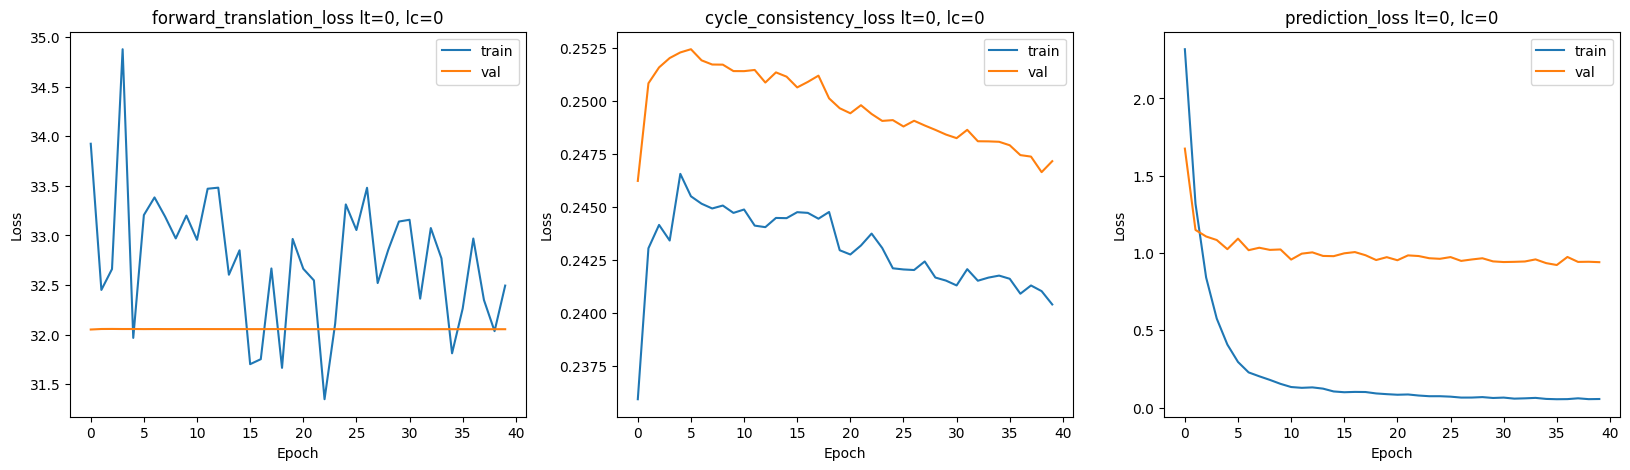

In [ ]:
baseline_trainer = run_experiment(0, 0, epochs=40)

<br></br>
### Movies Dataset Evaluation

In [ ]:
!gdown 1NjmsXhTjdAA6a-EZQSrgwkLU5RhOdvsK

Downloading...
From: https://drive.google.com/uc?id=1NjmsXhTjdAA6a-EZQSrgwkLU5RhOdvsK
To: /content/train.tsv
100% 8.48M/8.48M [00:00<00:00, 52.1MB/s]


In [ ]:
def load_movies_data(path='/content/train.tsv'):
  def _rescale(x, new_min, new_max):
      old_min, old_max = np.min(x), np.max(x)
      return (x - old_min) / (old_max - old_min) * (new_max - new_min) + new_min

  _, ax = plt.subplots(1,2, figsize=(14,5))
  movies_df = pd.read_csv(path, sep='\t')
  # rescale labels to the training data label distribution
  movies_df['label'] = _rescale(movies_df.Sentiment, -3, 3)

  movies_df['Sentiment'].hist(ax=ax[0])
  ax[0].set(title='Raw sentiment distribution')
  movies_df['label'].hist(ax=ax[1])
  ax[1].set(title='Re-scaled sentiment distribution')

  movies_seq = list(movies_df[['Phrase', 'label']].itertuples(index=False, name=None))
  return movies_seq

In [ ]:
class MoviesDataset(Dataset):
    def __init__(self, data, tokenizer: BertTokenizer):
        self.__data = data
        self.__tokenizer = tokenizer

    def __len__(self):
        return len(self.__data)

    def __getitem__(self, idx):
        return self.__data[idx]

    def collate_fn(self, batch):
        language, label = zip(*batch)
        language = self.__tokenizer(language, padding=True, return_tensors="pt")
        return language, FloatTensor(label)

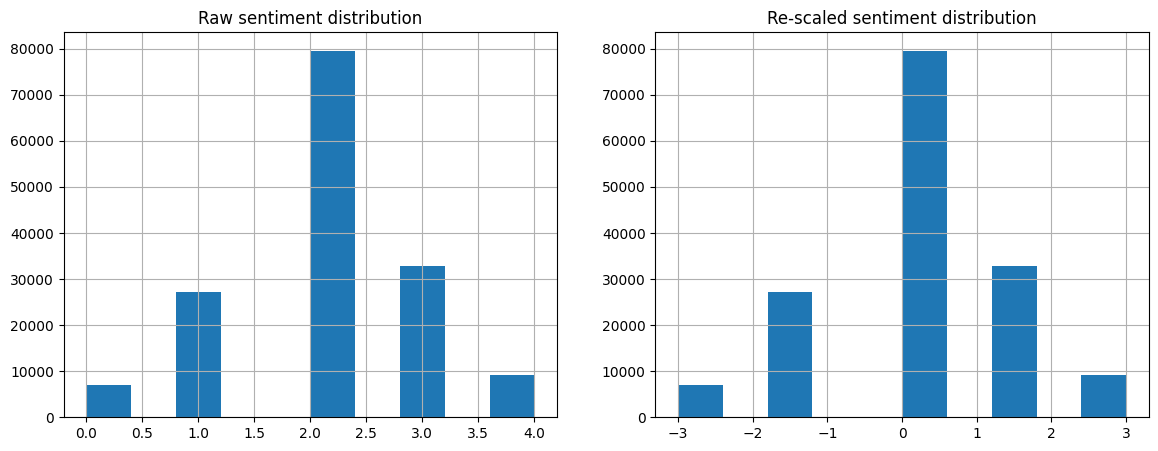

In [ ]:
movies_seq = load_movies_data()
movies_dataset = MoviesDataset(movies_seq, tokenizer)
movies_dl = DataLoader(movies_dataset, batch_size=64, shuffle=False, collate_fn=movies_dataset.collate_fn)

In [ ]:
def evaluate(mctn: MCTN, text_dl):
    mctn = mctn.to(DEVICE)
    mctn.eval()
    with no_grad(), tqdm(total=len(text_dl), desc="Evaluating", leave=False) as pbar:
        mse = MeanSquaredError().to(DEVICE)
        r2 = R2Score().to(DEVICE)

        for idx, (language, label) in enumerate(text_dl):
            language, label = language.to(DEVICE), label.to(DEVICE)
            outputs = mctn(language=language, label=label)

            # clculate regression evalutation metrics
            mse.update(outputs.prediction, label)
            r2.update(outputs.prediction, label)

            pbar.update(1)

    return {"mse": mse.compute().item(), "r2": r2.compute().item()}

In [ ]:
mctn_eval_results = evaluate(mctn_trainer.model, movies_dl)

In [ ]:
baseline_eval_results = evaluate(baseline_trainer.model, movies_dl)

In [ ]:
df = pd.DataFrame([mctn_eval_results, baseline_eval_results])
df.index =['MCTN', 'baseline']

In [ ]:
df

,mse,r2
MCTN,1.051824,0.414871
baseline,1.139170,0.366281
